$$ \Large{\textbf{Digital Signal Processing and Deep Learning:  Environment Sound Classification }} $$   
$$ \large{\textbf{Part I: Mel-Spectrograms and Convolutional Neural Networks}} $$

$$ \small{\textbf{Dr. Stéphane DEDIEU, December 2022. }} $$

# Introduction

<span style="color:#4169E1">  Automatic environmental sound supervised classification (ESC) based on ESC-50 dataset and ESC-10 subset, built by Dr. Karol Piczak and described in the following article: <br> 
<br>
"Karol J. Piczak. 2015. <b><i>"ESC: Dataset for Environmental Sound Classification."</i></b> In Proceedings of the 23rd ACM international conference on Multimedia (MM '15). Association for Computing Machinery, New York, NY, USA, 1015–1018. https://doi.org/10.1145/2733373.2806390". <br>
<br>
ESC-50 dataset is available from Dr. Piczak's Github: https://github.com/karoldvl/ESC-50/ <br>
<br>    
The following recent article is a descriptive survey for Environmental sound classification (ESC) detailing datasets, preprocessing techniques, features and classifiers. And their accuracy. <br>
<br>
Anam Bansal, Naresh Kumar Garg, <b><i>"Environmental Sound Classification: A descriptive review of the literature,</i></b> Intelligent Systems with Applications, Volume 16, 2022, 200115, ISSN 2667-3053, https://doi.org/10.1016/j.iswa.2022.200115.  <br>
<br>


<span style="color:#4169E1">  At that point, and before we start working on more advanced techniques, we: 
<span style="color:#4169E1"> 
    <br>
- <b>work with the ESC10 data-subset (10 classes of sounds)</b>
- test mel-spectrograms and wavelet transforms 
- train a Convolution Neural Network
- target an accuracy >>90 %

<span style="color:#4169E1"> Current Jupyter Notebook: <b> Part I </b> presents the methodology and results with <b> mel-spectrograms and a CNN algorithm. </b>      

## Type of sounds/noises:

<span style="color:#4169E1"> The ESC-10 dataset contains 5 seconds long <b>400 Ogg Vorbis audio clips</b>. Sampling frequency: 44.1 kHz, 32- bits float,  and <b>10 classes</b>.  40 audio clips per class.  <br> The 10 Sound/Noise classes are:    
    
<br>
<span style="color:#4169E1"> 
    
| n   |  Class   | Label |
| :---  | :--- | :--- |
|   01     | Dogbark    |   0   | 
|   02     | Rain    |   1   | 
|   03     | Seawaves    |  2    | 
|   04     | Babycry    |   3   | 
|   05     | Clocktick    |  4    | 
|   06     | Personsneeze    |  5    | 
|   07     | Helicopter    |   6   | 
|   08     | Chainsaw    |   7   | 
|   09     | Rooster    |    8  | 
|   10     | Firecrackling    |  9    | 
    
- dogbarking, babycry, person sneeze, rooster, involve the vibration, resonance of vocal (or nasal) tract or cords, a bit like speech, and is considered non-stationnary. 
- Rain, sea waves are somewhat stationary, rain sounds a bit like white noise. Let's say pseudo-stationnary because in various audio clips other noises are involved at times. 
- Helicopter, chainsaw: pseudo-stationary. If the engine r.p.m does not change in a timeframe, the process is stationary. With harmonics linked to the engine rpm, number of cylinders, and the number of rotor blades (helicopter).  
- Fire crakling: impulsive noise. 
- Clock tick: It depends. Impulsive every second (frequency= 1 Hz). But in some audio clips, there are several "pulsations" in a  1 second time frame. And the ticks have the signature of a non-linear mechanical vibration that radiates sound, with harmonics.


For information about noise from rotating devices: 
For engine    depends on rpm, 

By selecting "representative" samples,

# Methodology

<br>
<span style="color:#4169E1"> 
    
- In an effort to reduce the size of the problem and computation time, while retaining relevant information, we:  
    - reduce audio sampling frequency from 44.1 kHz to 22.05 kHz.     
    - reduce the length of audio clips, to 1.25s, based on signal power considerations. Too many audio clips have multiple occurences of the same sound phenomenon: dog barking, baby crying for example and most of the signal is "silence". 
- Normalize audio signal amplitude to maximum= 1 (0 dBFS). 
- Compute mel-spectrograms. Optimize mel-spectrogram parameters for maximum details.  
- Deep learning with 256x256 grayscale images and Convolutional Neural Networks
- Convolutional Neural Network: 5 layers, 32, 128, 256, 512, 512 nodes per layer. Adam optimizer. (parameters are described into details in Deep Learning CNN section).  
    
    
    
<img src="MelSpectrogram_91pc_spectros.png" alt="Drawing" style="width: 450px;"/> 
<figcaption style="text-align:center;color:black;font-size:14px;"> <sub><b><i>Mel-spectrograms of selected sounds in each category.</i></b></sub> </figcaption>
    
    
    
    
    

# Results

<span style="color:#4169E1"> The notebook is a bit long.  We present results and conclusions here. 


<span style="color:#4169E1"> Without any particular optimization, classification accuracy with Mel-spectrograms is generally in the 78-82% range. <br> 
Optimizing: number of mels, number of points for the FFTs, creates nice mel-spectrograms with relevant details. (see description in the notebook).  
With our optimized preprocessing decribed in the Methodology section, accuracy varies from 87 to 93%  (in fact 92.5%) . <br>
<br>
One of the best results is presented below:  

<table border="1" width='750px'>
<tr>
    <td> <img src="MelSpectrogram_classification_93pc.png" alt="Drawing" style="width: 350px;"/> 
        <figcaption style="text-align:center;color:black;font-size:14px;"> <sub><b><i>Classification accuracy</i></b></sub> </figcaption> </td>
    <td> <img src="MelSpectrogram_confusion_93pc.png" style="width: 350px;"/> 
        <figcaption style="text-align:center;color:black;font-size:14px;"> <sub><b><i> Confusion Matrix </i></b></sub> </figcaption>  </td>

</tr>
<tr style='text-align:center; vertical-align:middle'></tr> 
<table border="1" width='750px'>   
<tr>    
<figcaption style="text-align:center;color:black;font-size:14px;"> <b><i> Best results with Mel-Spectrograms and CNN  </i></b> </figcaption>
</tr>  


<span style="color:#4169E1">   Based on different runs, there is generally some residual confusion: <br> 
    
<span style="color:#4169E1"> 
    
- either in the non-stationary category resulting from vibration, resonance of vocal (or nasal) tract or cords:  dogbark, rooster, person sneeze... 
- or in the impulsive noise category: clocktick and firecrackling like in the present example.
- and in the pseudo-stationary category: seawave/rain  and sometimes rain/chainsaw, helicopter/firecrakling

# Conclusions
<br>
<span style="color:#4169E1">

- Mel-spectrograms (256x256) and CNN allow achieving a high accuracy between 88 and 93% with ESC-10 dataset. 
- Some residual confusion persists. 
- Improvement could come from a better optimization of CNN hyperparameters.
- At that point we implemement a new preprocessing with more information for a better discrimination of "difficult" sounds:  complex Continous Wavelet Tranforms (complex CWT). 
- The CNN will be trained with 2 types of images: scalograms magnitude and phase. Methodology and Results are presented in <b>Part II </b>. 

##  Required libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa.display
import pylab
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import librosa    
import glob
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras import optimizers
import keras


In [2]:
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
# This was for Machine Learning. 
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [3]:
#--------------------------------------------
# IMPROVED CONFUSION MATRIX
#--------------------------------------------

def plot_confusion_matrix(y,y_predict, labels_inputs):
    "this function plots the confusion matrix"
    
   # cm = confusion_matrix(y_test, y_pred, labels=svm_cv.classes_)
    #disp = ConfusionMatrixDisplay(confusion_matrix=cm,\
                              #   display_labels=svm_cv.classes_)
    
    
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    #sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    sns.heatmap(cm, square=True, annot=True, annot_kws={'fontsize':16}, fmt="d", cmap='Blues', cbar=True)  # modified for cosmetic reasons. We want beauty. 
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
 
    ax.xaxis.set_ticklabels(labels_inputs)
    ax.yaxis.set_ticklabels(labels_inputs)

## Import Audio Recordings 


Note: The audio clips/recordings are stored locally for in-depth analysis and flexibility. Modify the code if you import audio clips from Dr. Piczak's Github account: https://github.com/karoldvl/ESC-50/. <br>
As explained in methodology, we reduce the sampling frequency. 

In [4]:
from scipy import signal
from scipy.signal import lfilter 

##### Takes time !  

In [5]:
import time

classes = []
label_number=0
labels = []
file_names = []
data = []



for filepath in glob.iglob('ESC-10/*'):
    classes.append(filepath[8:])
print('  ')
print('running....')
print('  ')
download_audio_start= time.time()   

for i in classes:
    print("Class = "+i+", Label = "+str(label_number))

    for j in glob.iglob('ESC-10/0'+i+'/*'):

        #y, s = librosa.load(j, sr=16000) # Downsample 44.1kHz to 16000kHz  FOR wavelets 
        #y, fs = librosa.load(j, sr=44100) # Downsample 44.1kHz to 16000kHz
        y, fs = librosa.load(j, sr=22050) # Downsample 44.1kHz to 16000kHz
        data.append([y,label_number])                #  for analysis

    label_number = label_number + 1

download_audio_end= time.time()   
print('  ')
print(f'Download audio computing time (s) {download_audio_end - download_audio_start:.2f}') 

  
running....
  
Class = 01-Dogbark, Label = 0
Class = 02-Rain, Label = 1
Class = 03-Seawaves, Label = 2
Class = 04-Babycry, Label = 3
Class = 05-Clocktick, Label = 4
Class = 06-Personsneeze, Label = 5
Class = 07-Helicopter, Label = 6
Class = 08-Chainsaw, Label = 7
Class = 09-Rooster, Label = 8
Class = 10-Firecrackling, Label = 9
  
Download audio computing time (s) 248.37


In [6]:
audio_data=[]
labels=[]

for i,j in data:
    audio_data.append(i)
    labels.append(j)

In [7]:
audio_data=np.array(audio_data,dtype=object)
labels=np.array(labels,dtype=object)

In [8]:
time_vector=(1/fs)*np.arange(len(audio_data[0]))  # time (s) vector 

#### Listening to recordings

In [9]:
# random selection of audio clips in all categories
ind=[3, 43, 82, 122, 165, 208, 245, 284, 326, 365 ]

In [10]:
from IPython.display import Audio
Audio(data=audio_data[ind[0]], rate=fs)
Audio(data=audio_data[ind[4]], rate=fs)

#### Plot dog bark recordings 

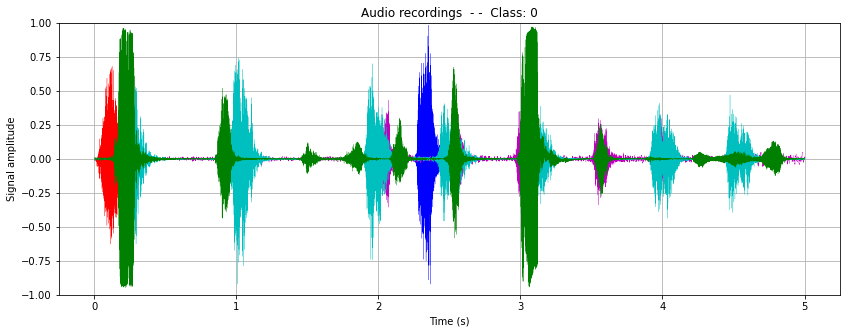

In [11]:
fig=plt.figure(figsize=(14,5))

colors=['b','r','m','c','g','k','y', 'grey', 'c', 'm', 'r' ]
for j in range(5) :

    plt.plot(time_vector, audio_data[j], color=colors[j],linewidth=0.25)


plt.ylim(-1, 1)
plt.xlabel('Time (s)')
plt.ylabel('Signal amplitude')
plt.title('Audio recordings  - -  Class: '+str(labels[j]))
plt.grid()

<span style="color:#4169E1"> In this dog barking audio clips subset [0:5], one audio clip consists of 4.5 s of silence and one 0.5 s dog barking occurence. 
Other audio clips consist of several occurences of the same phenomenon. <br> We will reduce the length of <b>ALL</b> audio clips in all classes to 1.25s. For retaining the clock tick fundamental frequency= 1 Hz.  

#### Plot various audio signals 

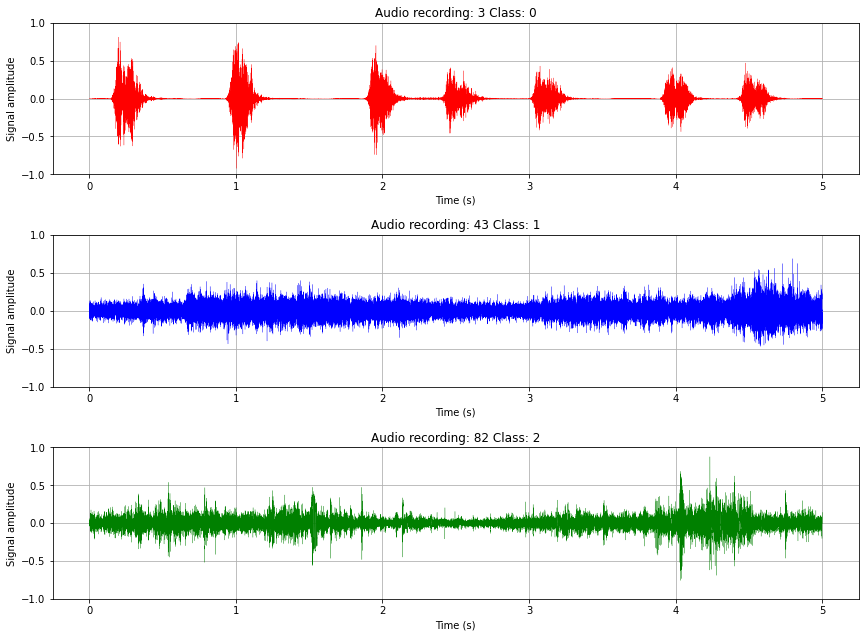

In [12]:
fig=plt.figure(figsize=(14,10))


ax = fig.add_subplot(3, 1, 1)
#  RGBA tuple  ((0,1,0,1))    Alpha is ytransparecy from 0 to 1   
plt.plot(time_vector,audio_data[ind[0]][0:len(time_vector)],'r',linewidth=0.25)
ax.set_ylim(-1, 1)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Signal amplitude')
plt.title('Audio recording: '+str(ind[0])+' Class: '+str(labels[ind[0]]))
ax.grid()
#plt.show()

ax = fig.add_subplot(3, 1, 2)
#  RGBA tuple  ((0,1,0,1))    Alpha is ytransparecy from 0 to 1   
plt.plot(time_vector,audio_data[ind[1]][0:len(time_vector)],'b',linewidth=0.25)
ax.set_ylim(-1, 1)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Signal amplitude')
plt.title('Audio recording: '+str(ind[1])+' Class: '+str(labels[ind[1]]))
ax.grid()
#plt.show()

ax = fig.add_subplot(3, 1, 3)
#  RGBA tuple  ((0,1,0,1))    Alpha is ytransparecy from 0 to 1   
plt.plot(time_vector,audio_data[ind[2]][0:len(time_vector)],'g',linewidth=0.25)
ax.set_ylim(-1, 1)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Signal amplitude')
plt.title('Audio recording: '+str(ind[2])+' Class: '+str(labels[ind[2]]))
ax.grid()

# set the spacing between subplots
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
plt.show()

### Reducing the size of audio signals 

<span style="color:#4169E1"> We split all audio clips in 1.25 s frames. With overlap (step= st). And <b> we select the frame with the highest power </b> for each audio clip. <br>
    <b>Note:</b> the dot product frames[i]\*frames[i].T is proportional to the audio signal power. 

In [13]:
from scipy import signal
from skimage import util

In [14]:
sub_sequence= fs*1.25    #  1.25 seconds of signal ! 
st=400 #  samples for sliding the window ith overlap  
audio_data_red = []

print('running...   ')
print('  ')
reduc_audio_start= time.time() 

for i in range (0,400):
    if i%99 == 0:
        print(i)
        
    frames = util.view_as_windows(audio_data[i], window_shape=(sub_sequence,), step=st) 
    optim_frame_index= np.dot(frames,frames.T).diagonal().argmax()     
        
    audio_data_red.append(frames[optim_frame_index]/np.max(frames[optim_frame_index]))   

reduc_audio_end= time.time()   
print('  ')
print(f'Audio clip size reduction computing time (s) {reduc_audio_end - reduc_audio_start:.2f}')

running...   
  
0
99
198
297
396
  
Audio clip size reduction computing time (s) 58.28


In [15]:
np.shape(frames), np.shape(audio_data_red)
time_red=len(audio_data_red[0])
time_red

27562

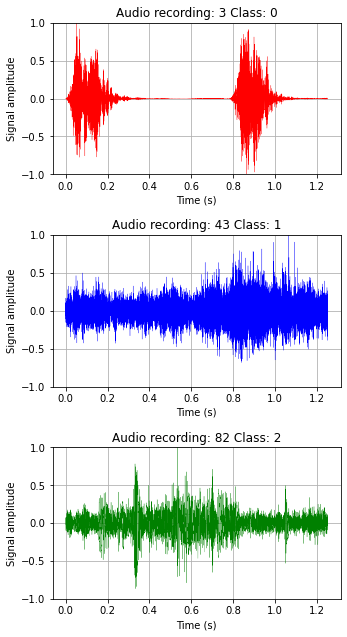

In [16]:
#save_path='dog_time.jpg'
fig=plt.figure(figsize=(5,10))
#plt.title('Figure 8 Torus')

ax = fig.add_subplot(3, 1, 1)
#  RGBA tuple  ((0,1,0,1))    Alpha is transparency from 0 to 1   
plt.plot(np.arange(time_red)/fs,audio_data_red[ind[0]][0:time_red],'r',linewidth=0.25)
ax.set_ylim(-1, 1)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Signal amplitude')
plt.title('Audio recording: '+str(ind[0])+' Class: '+str(labels[ind[0]]))
ax.grid()
#plt.show()

ax = fig.add_subplot(3, 1, 2)
#  RGBA tuple  ((0,1,0,1))    Alpha is ytransparecy from 0 to 1   
plt.plot(np.arange(time_red)/fs,audio_data_red[ind[1]][0:time_red],'b',linewidth=0.25)
ax.set_ylim(-1, 1)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Signal amplitude')
plt.title('Audio recording: '+str(ind[1])+' Class: '+str(labels[ind[1]]))
ax.grid()
#plt.show()


ax = fig.add_subplot(3, 1, 3)
#  RGBA tuple  ((0,1,0,1))    Alpha is ytransparecy from 0 to 1   
plt.plot(np.arange(time_red)/fs,audio_data_red[ind[2]][0:time_red],'g',linewidth=0.25)
ax.set_ylim(-1, 1)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Signal amplitude')
plt.title('Audio recording: '+str(ind[2])+' Class: '+str(labels[ind[2]]))
ax.grid()

# set the spacing between subplots
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
plt.show()

In [17]:
time_vector_red=(1/fs)*np.arange(len(audio_data_red[0]))  # time (s) vector 

## Mel-Spectrograms 

<span style="color:#4169E1"> We compute and plot the the Mel-Spectrograms of 10 audio clips, one in each sound category. 
And optimize mel-spectrograms parameters: hop length, NFFT, number of mels, for the best comproise in terms of clear images and best representation/extraction of sound characteristics.<br>
    <b>Dimensions of the mel-spectrogram: nmels x   </b> 

- Class = 01-Dogbark, Label = 0
- Class = 02-Rain, Label = 1
- Class = 03-Seawaves, Label = 2
- Class = 04-Babycry, Label = 3
- Class = 05-Clocktick, Label = 4
- Class = 06-Personsneeze, Label = 5
- Class = 07-Helicopter, Label = 6
- Class = 08-Chainsaw, Label = 7
- Class = 09-Rooster, Label = 8
- Class = 10-Firecrackling, Label = 9

<span style="color:#4169E1"> We optimize parameters: n_mels, hop_length for creating 256 x 256 mel-spectrograms. <br>
Note that the CNN will be trained with mel-spectrogram matrices, i.e.<b> gray scale images </b>. Not color images.   

In [96]:
melspec = []
hp_l= 108  # creates 256 samples in the time domain.  
n_m = 256
NFFT=1024*2  # high definition. Remember 1 sec audio signal <--->  fs= 44100 points  or  fs= 22050 points 
trunc_mel= 256  # number of mels filters 


ind=[3, 43, 82, 122, 165, 208, 245, 284, 326, 365 ]

for i in ind:
    #print(i)
    mel_feature = librosa.feature.melspectrogram(y=audio_data_red[i],sr=fs,
                                          n_fft= NFFT, 
                                          hop_length= hp_l, 
                                          win_length= NFFT, 
                                          window='hann', center=True, power=2, pad_mode='constant', n_mels=n_m)
    
    pwr = librosa.power_to_db(mel_feature, ref=1e-3)
    melspec.append(pwr)  

melspec =np.array(melspec)

In [19]:
np.shape(melspec) # From -80 dB to 0 dB 

(10, 256, 256)

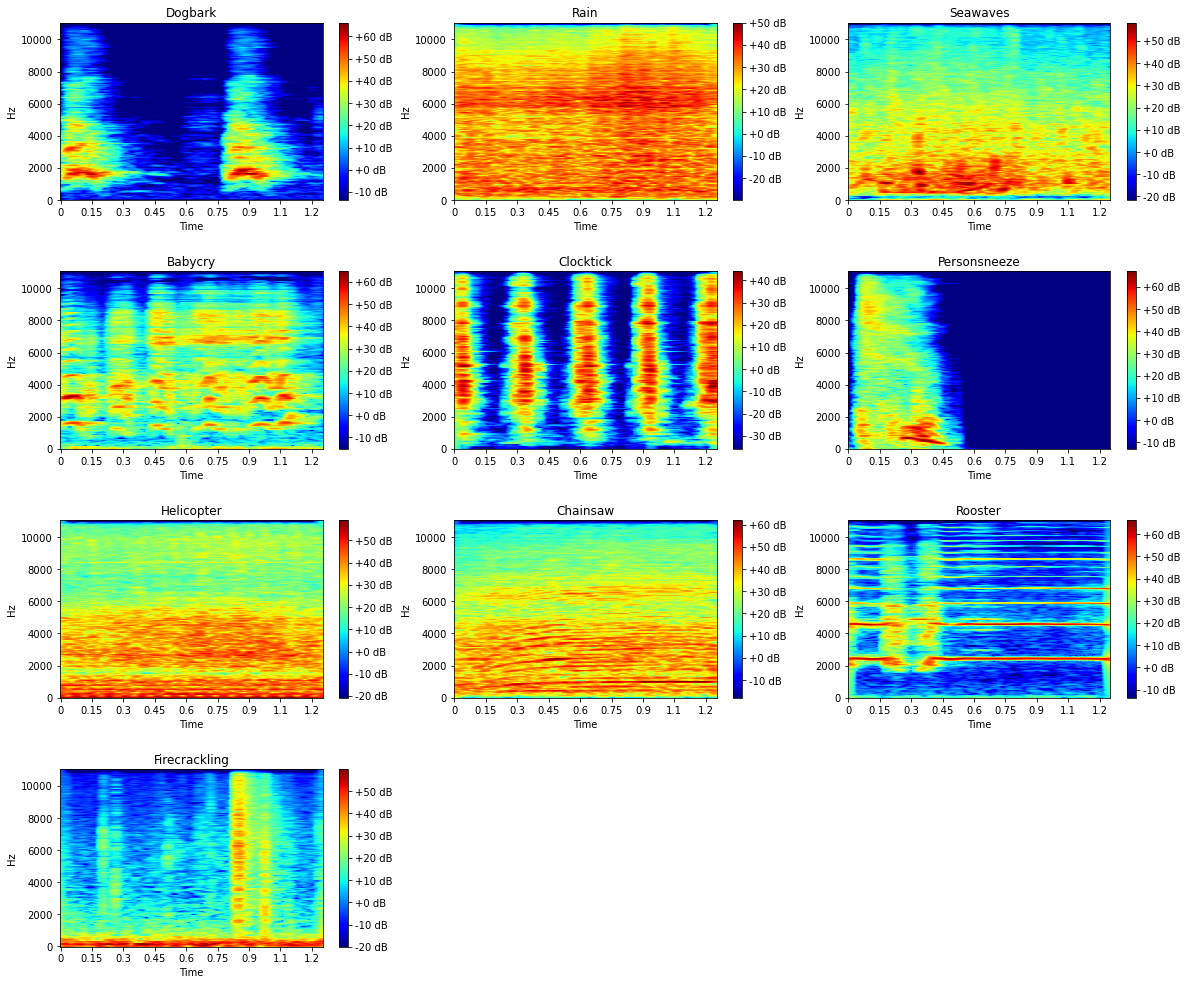

In [20]:
list_soundtype=['Dogbark', 'Rain', 'Seawaves', 'Babycry',  'Clocktick', 'Personsneeze',\
                                             'Helicopter', 'Chainsaw',  'Rooster',  'Firecrackling' ]        


fig=plt.figure(figsize=(20,17))
plt.subplots_adjust(#left=0.1,
                    #bottom=0.1,
                    #right=0.9,
                    #top=0.9,
                    #wspace=0.5,
                    hspace=0.4)

for ii in range(3) :
    for jj in range(3) :
        k=3*ii + jj
        ax = fig.add_subplot(4, 3, k+1)
        mels_dB=np.array(melspec[k,0:trunc_mel,:])
        img=librosa.display.specshow(mels_dB, y_axis='linear',   hop_length=hp_l, sr=fs,  
                         x_axis='time',  ax=ax, cmap='jet')
        fig.colorbar(img, ax=ax, format='%+2.0f dB')
        #ax.set(title='Mel-frequency spectrogram'+list_soundtype[k])
        ax.set(title=list_soundtype[k])
        
        
ax = fig.add_subplot(4, 3, 10)
mels_dB=np.array(melspec[9,0:trunc_mel,:])
img=librosa.display.specshow(mels_dB, y_axis='linear',   hop_length=hp_l, sr=fs,  
                         x_axis='time',  ax=ax, cmap='jet')
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title=list_soundtype[9])

plt.show()


<span style="color:#4169E1"> We create mel-spectograms for the 400 audio clips. 

In [21]:
melspectrogram = []
# All parameters defined already - NO parameter update here !!!  
print('running...   ')
print('  ')
melspec_audio_start= time.time() 

for i in range (0,400):
    if i%99 == 0:
        print(i)
    mel_feat = librosa.feature.melspectrogram(y=audio_data_red[i],sr=fs,
                                          n_fft= NFFT, 
                                          hop_length= hp_l, 
                                          win_length= NFFT, 
                                          window='hann', 
                                          center=True, 
                                          power=2, pad_mode='constant', n_mels=n_m)
    
    mel_feat=mel_feat[0:trunc_mel,:]  # Truncation number of mel filters 
    pwr = librosa.power_to_db(mel_feat, ref=1e-3)

    pwr=pwr.reshape(-1,1)
    melspectrogram.append(pwr)  

melspectrogram =np.array(melspectrogram) 
melspectrogram.shape

melspec_audio_end= time.time()   
print('  ')
print(f'mel-spectrum audio computing time (s) {melspec_audio_end - melspec_audio_start:.2f}') 

running...   
  
0
99
198
297
396
  
mel-spectrum audio computing time (s) 40.82


In [22]:
np.shape(mel_feat)
np.min(pwr), np.max(pwr),   np.shape(pwr), np.shape(melspectrogram)

(-18.19762, 61.80238, (65536, 1), (400, 65536, 1))

<span style="color:#4169E1">  We represent scalograms as 400 vectors for <b>scaling/normalization</b>. 
We will reshape the 400 vectors into 400 "image" matrices (n_scales,-1) for Deep Learning. <br>
In all runs, the standard normalizer seems to work better than the minmaxscaler. To be confirmed.   <br>
Both options can be tested.  

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
melspectro=melspectrogram.reshape(400,-1)  

scaler.fit(melspectro)
normalized_melspectro = scaler.transform(melspectro)

print(np.amax(melspectro))
print(np.amax(normalized_melspectro))

In [98]:
# StandardScaler - Better!  Note: apparently by default, the grayscale images will be rescaled from [min<0, max] to 0 to 255. To be confirmed.     

In [24]:
from sklearn import preprocessing
melspectro=melspectrogram.reshape(400,-1)
transform = preprocessing.StandardScaler()
normalized_melspectro= transform.fit_transform(melspectro)

In [25]:
 np.min(melspectro), np.max(melspectro)

(-48.792603, 73.09975)

In [26]:
np.min(normalized_melspectro), np.max(normalized_melspectro)

(-5.1998096, 3.9930174)

In [27]:
np.shape(normalized_melspectro)

(400, 65536)

In [28]:
labels=np.array(labels,dtype=int)
#labels

## Convolutional Neural Network

<span style="color:#4169E1"> We turned normalized melspectrograms into pictures (matrices). 

In [29]:
features_CNN = np.reshape(normalized_melspectro,(400,n_m, -1,1))
features_CNN.shape

(400, 256, 256, 1)

Text(0.5, 1.0, 'Sea Waves - Mel-Spectrogram Transform')

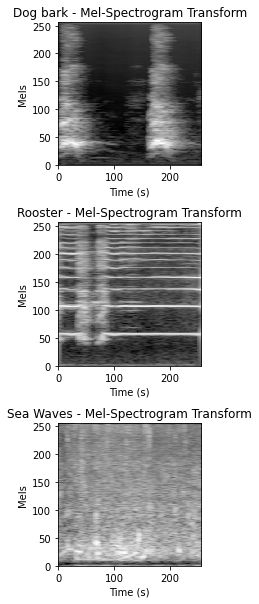

In [30]:
#plt.imshow(sub_time, scales, features_cwt_CNN[122,::-1,:,0] ,cmap='gray')
fig=plt.figure(figsize=(14,10))

plt.subplots_adjust(#left=0.1,
                    #bottom=0.1,
                    #right=0.9,
                    #top=0.9,
                    #wspace=0.5,
                    hspace=0.4)

ax = fig.add_subplot(3, 1, 1)
plt.imshow(features_CNN[3,::-1,:,0] ,cmap='gray',interpolation='none', extent=[0,np.shape(melspec)[2],0,np.shape(melspec)[1]])
ax.set_xlabel('Time (s)')
ax.set_ylabel('Mels')
ax.set_title('Dog bark - Mel-Spectrogram Transform')


ax = fig.add_subplot(3, 1, 2)
plt.imshow(features_CNN[326,::-1,:,0] ,cmap='gray',interpolation='none', extent=[0,np.shape(melspec)[2],0,np.shape(melspec)[1]])
ax.set_xlabel('Time (s)')
ax.set_ylabel('Mels')
ax.set_title('Rooster - Mel-Spectrogram Transform')


ax = fig.add_subplot(3, 1, 3)
plt.imshow(features_CNN[82,::-1,:,0] ,cmap='gray',interpolation='none', extent=[0,np.shape(melspec)[2],0,np.shape(melspec)[1]])
ax.set_xlabel('Time (s)')
ax.set_ylabel('Mels')
ax.set_title('Sea Waves - Mel-Spectrogram Transform')


In [31]:
ylabels=keras.utils.to_categorical(labels, num_classes=10, dtype='float32')

In [32]:
ylabels[41]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

<span style="color:#4169E1"> Train/Test split: 80/20%, we shuffle the dataset. <br> And we stratify the sets based on labels. In this case, in both sets, we should have the same number of audio clips in each category.     

In [33]:
(train_X,test_X,train_y,test_y)= train_test_split(features_CNN, ylabels, test_size=0.2, stratify=ylabels, random_state=5)

In [34]:
np.shape(train_X), np.shape(train_y), np.shape(test_X), np.shape(test_y)

((320, 256, 256, 1), (320, 10), (80, 256, 256, 1), (80, 10))

#### <b> CNN Parameters: </b>

<span style="color:#4169E1"> Quick discussion about parameters:

<span style="color:#4169E1">
    
- number of layers: 5 hidden layers.
- number of neurons per layers: generally we go with $2^n$ nodes per layer. We started with small numbers and optimized the number of nodes and layers. 64, 128, 256, 512, 512 allowed reaching an accuracy above 93%. After several runs.     
    - "image" matrices are <b>256x256 grayscale images</b>. We tried (5,5) filters.  (3,3) filters proved sufficient. We let Stride and convolution Dilation rate at default values: (1,1). 
- optimizer: we tested Stochastic Gradient Descent (SGD) and Adam with different parameters. Adam was always superior. AMSGrad option may have further improved convergence.  
- overfitting was an issue initially: drop-out, with probability threshold between 0.1 and 0.2 prevented overfitting while converging to close to maximum accuracy. With current implementation no overfitting occurs (hence no drop-out).   
- activation functions: both "ReLU" or "LeakyReLU (alpha:0.1-0.2") work. A slight advantage with ReLU.  

In [78]:
from keras.layers import LeakyReLU

model = Sequential()
#
model.add(Conv2D(32, (3, 3), dilation_rate=(1,1), input_shape=train_X.shape[1:]))
#model.add(Conv2D(64, (5, 5), dilation_rate=(1,1), input_shape=train_X.shape[1:]))
model.add(Activation('relu'))
#model.add(LeakyReLU(alpha=0.2))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.1))
#
#
model.add(Conv2D(64, (3, 3), dilation_rate=(1,1)))
#model.add(Conv2D(64, (5, 5), dilation_rate=(1,1))
model.add(Activation('relu'))
#model.add(LeakyReLU(alpha=0.2))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.1))


#model.add(Conv2D(256, (3, 3),dilation_rate=(1,1) )   )
model.add(Conv2D(128, (3, 3),dilation_rate=(1,1) )   )
model.add(Activation('relu'))
#model.add(LeakyReLU(alpha=0.2))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.1))
#
#model.add(Conv2D(512, (3, 3), dilation_rate=(1,1)))
model.add(Conv2D(256, (3, 3),dilation_rate=(1,1) )   )
model.add(Activation('relu'))
#model.add(LeakyReLU(alpha=0.2))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.1))
#
#---- fully connected layer
model.add(Flatten())      # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(512))  
model.add(Activation('relu'))
#model.add(LeakyReLU(alpha=0.2))
#model.add(Dropout(0.1))

#--- Softmax classifier
#
model.add(Dense(10))
model.add(Activation('softmax'))
#------ Otimizers
opt=tf.keras.optimizers.Adam(
    learning_rate=0.0001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-08,
    amsgrad=True,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    name='Adam')
#sgd = optimizers.SGD(learning_rate=0.0001, decay=1e-5, momentum=0.8, nesterov=True)
#sgd = optimizers.SGD(learning_rate=0.001, decay=1e-3, momentum=0.8, nesterov=True)
sgd = optimizers.SGD(learning_rate=0.00025, decay=1e-4, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              #optimizer=sgd,
              optimizer=opt,
              metrics=['accuracy'])

In [79]:
accuracy_threshold=0.92

class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('val_accuracy') > accuracy_threshold):   
            print("\nReached %2.2f%% accuracy, we stop training." %(accuracy_threshold*100))   
            self.model.stop_training = True

In [80]:
custom_early_stopping = myCallback()

In [81]:
history = model.fit(
    train_X, 
    train_y, 
    epochs=40, 
    steps_per_epoch=len(train_X)//16,
    #validation_split=0.2, 
    validation_data=(test_X, test_y),
    batch_size=10, 
    #verbose=2,
    callbacks=[custom_early_stopping]
)

Epoch 1/40
20/20 [==============================] - 52s 2s/step - loss: 2.0107 - accuracy: 0.2550 - val_loss: 1.3851 - val_accuracy: 0.4375
Epoch 2/40
20/20 [==============================] - 39s 2s/step - loss: 1.1928 - accuracy: 0.5450 - val_loss: 0.9783 - val_accuracy: 0.6250
Epoch 3/40
20/20 [==============================] - 44s 2s/step - loss: 1.0215 - accuracy: 0.6400 - val_loss: 1.0868 - val_accuracy: 0.5500
Epoch 4/40
20/20 [==============================] - 48s 2s/step - loss: 0.8207 - accuracy: 0.6950 - val_loss: 0.6432 - val_accuracy: 0.8000
Epoch 5/40
20/20 [==============================] - 44s 2s/step - loss: 0.6759 - accuracy: 0.7650 - val_loss: 0.5752 - val_accuracy: 0.8000
Epoch 6/40
20/20 [==============================] - 43s 2s/step - loss: 0.4524 - accuracy: 0.8600 - val_loss: 0.5747 - val_accuracy: 0.7875
Epoch 7/40
20/20 [==============================] - 38s 2s/step - loss: 0.4162 - accuracy: 0.8600 - val_loss: 0.7348 - val_accuracy: 0.7000
Epoch 8/40
20/20 [==

In [82]:
test_loss, test_acc = model.evaluate(test_X, test_y) 

3/3 [==============================] - 4s 1s/step - loss: 0.3544 - accuracy: 0.9250


In [83]:
predictions= model.predict(x=test_X, batch_size=10)

8/8 [==============================] - 5s 531ms/step


In [84]:
predictions=predictions + 1e-09

In [85]:
test_y=test_y+1e-09

In [86]:
list_sound=['DogBark', 'Rain', 'SeaWaves', 'BabyCry',  'ClockTick', 'PersonSneeze',\
                                             'Helico', 'Chainsaw',  'Rooster',  'FireCrackling' ] 

In [87]:
from sklearn.metrics import classification_report
print(classification_report(test_y.argmax(axis=1), predictions.argmax(axis=1), target_names= list_sound))

               precision    recall  f1-score   support

      DogBark       1.00      1.00      1.00         8
         Rain       0.80      1.00      0.89         8
     SeaWaves       1.00      0.88      0.93         8
      BabyCry       1.00      1.00      1.00         8
    ClockTick       0.78      0.88      0.82         8
 PersonSneeze       1.00      1.00      1.00         8
       Helico       1.00      0.88      0.93         8
     Chainsaw       1.00      0.88      0.93         8
      Rooster       1.00      1.00      1.00         8
FireCrackling       0.75      0.75      0.75         8

     accuracy                           0.93        80
    macro avg       0.93      0.93      0.93        80
 weighted avg       0.93      0.93      0.93        80



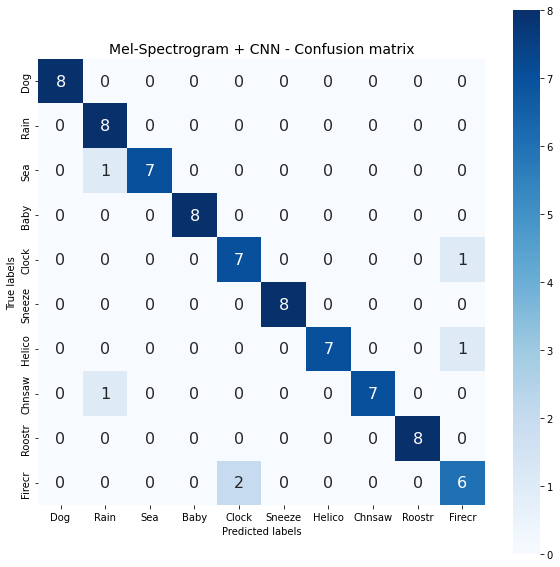

In [88]:
list_sound=['Dog', 'Rain', 'Sea', 'Baby',  'Clock', 'Sneeze',\
                                             'Helico', 'Chnsaw',  'Roostr',  'Firecr' ] 
fig=plt.figure(figsize=(10,10))
plot_confusion_matrix(test_y.argmax(axis=1), predictions.argmax(axis=1),list_sound)
plt.title("Mel-Spectrogram + CNN - Confusion matrix", fontsize=14)
plt.savefig("CNN_Mel-Spectrogram_ConfusionMatrix_figure10.png")
plt.show()

<span style="color:#4169E1">   There is some confusion: <br>
<span style="color:#4169E1"> 
- in the non-stationary category resultng from vibration of tract, or nasal vibration:  dogbark, rooster, person sneeze... 
- in the impulsive noise category: clocktick and firecrackling.



<span style="color:#4169E1"> 

- Class = 01-Dogbark, Label = 0
- Class = 02-Rain, Label = 1
- Class = 03-Seawaves, Label = 2
- Class = 04-Babycry, Label = 3
- Class = 05-Clocktick, Label = 4
- Class = 06-Personsneeze, Label = 5
- Class = 07-Helicopter, Label = 6
- Class = 08-Chainsaw, Label = 7
- Class = 09-Rooster, Label = 8
- Class = 10-Firecrackling, Label = 9

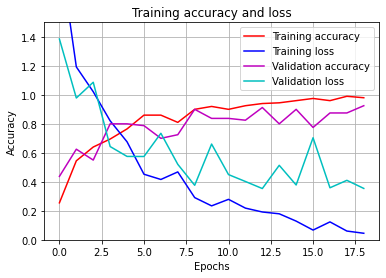

In [91]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs,loss, 'b', label='Training loss')
plt.plot(epochs, val_acc, 'm', label='Validation accuracy')
plt.plot(epochs, val_loss, 'c', label='Validation loss')
plt.title('Training accuracy and loss')
plt.legend(loc=0)
plt.ylim([0,1.5])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.grid()
plt.show()

In [92]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 254, 254, 32)      320       
                                                                 
 activation_48 (Activation)  (None, 254, 254, 32)      0         
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 127, 127, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 activation_49 (Activation)  (None, 125, 125, 64)      0         
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 62, 62, 64)       0         
 g2D)                                                 

model.save('Model_MelSpectrogram_22kHz_v2.h5')

https://stackoverflow.com/questions/55590219/visualizing-deep-layer-filters-in-keras-cnn

In [93]:
filter0 = model.layers[0].get_weights()[0][:,:,:,:]
filter1 = model.layers[1].get_weights()
np.shape(model.layers)

(17,)

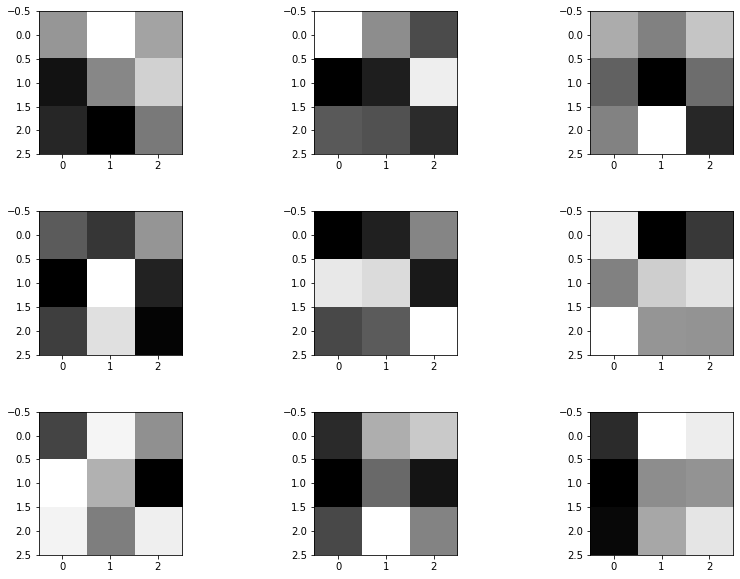

In [94]:
fig=plt.figure(figsize=(14,10))

plt.subplots_adjust(#left=0.1,
                    #bottom=0.1,
                    #right=0.9,
                    #top=0.9,
                    #wspace=0.5,
                    hspace=0.4)

ax = fig.add_subplot(3, 3, 1)
plt.imshow(filter0[:,:,0,0], cmap='gray')

ax = fig.add_subplot(3, 3, 2)
plt.imshow(filter0[:,:,0,1], cmap='gray')

ax = fig.add_subplot(3, 3, 3)
plt.imshow(filter0[:,:,0,2], cmap='gray')

ax = fig.add_subplot(3, 3, 4)
plt.imshow(filter0[:,:,0,3], cmap='gray')

ax = fig.add_subplot(3, 3, 5)
plt.imshow(filter0[:,:,0,4], cmap='gray')

ax = fig.add_subplot(3, 3, 6)
plt.imshow(filter0[:,:,0,5], cmap='gray')

ax = fig.add_subplot(3, 3, 7)
plt.imshow(filter0[:,:,0,6], cmap='gray')

ax = fig.add_subplot(3, 3, 8)
plt.imshow(filter0[:,:,0,7], cmap='gray')

ax = fig.add_subplot(3, 3, 9)
plt.imshow(filter0[:,:,0,8], cmap='gray')



In [95]:

for layer in model.layers:

    if 'conv' not in layer.name:
        continue   
    filters , bias = layer.get_weights()

    print(layer.name , filters.shape)

conv2d_33 (3, 3, 1, 32)
conv2d_34 (3, 3, 32, 64)
conv2d_35 (3, 3, 64, 128)
conv2d_36 (3, 3, 128, 256)
